In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def generate_simple(f, dots_count, dist, density, variance, w):
    X = np.linspace(-dist, dist, density)
    Y = np.array([f(x, w) for x in X])
    Dataset_X = np.random.rand(dots_count, 1) * 2 * dist - dist
    Dataset_Y = np.array([(f(x, w) + np.random.uniform(-1, 1) * variance) for x in Dataset_X])

    # print("X", X.shape)
    # print("Y", Y.shape)
    # print("Dataset_X", Dataset_X.shape)
    # print("Dataset_Y", Dataset_Y.shape)

    return X, Y, Dataset_X, Dataset_Y

In [16]:
def generate(f, dots_count, dist, density, radius, weights):
    """
    Creates instance of dataset generator.
    :param dots_count:
    :param dist:
    :param radius:
    :param density:
    :param weights:
    """

    X = np.linspace(-dist, dist, density)
    Y = np.array([f(x, weights) for x in X])
    dataset_X = []
    dataset_Y = []

    x_min = min(X) - radius
    y_min = min(Y) - radius
    x_max = max(X) + radius
    y_max = max(Y) + radius

    method = 'cpu'
    if torch.cuda:
        if torch.cuda.is_available():
            method = 'cuda'

    # print(method)
    device = torch.device(method)
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
    Y_tensor = torch.tensor(Y, dtype=torch.float32).to(device)

    while len(dataset_X) < dots_count:
        x_rand = torch.empty(1).uniform_(x_min, x_max).to(device)
        y_rand = torch.empty(1).uniform_(y_min, y_max).to(device)

        within_radius = (x_rand - X_tensor) ** 2 + (y_rand - Y_tensor) ** 2 <= radius ** 2
        if torch.any(within_radius):
            dataset_X.append(x_rand.item())
            dataset_Y.append(y_rand.item())

    dataset_X = np.array(dataset_X)
    dataset_Y = np.array(dataset_Y)
    # print("X", X.shape)
    # print("Y", Y.shape)
    # print("dataset_X", dataset_X.shape)
    # print("dataset_Y", dataset_Y.shape)

    return X, Y, dataset_X, dataset_Y

In [17]:
def print_generated(X, Y, Dataset_X, Dataset_Y):
    # Plot style:
    plt.style.use('default')
    _ = plt.figure(figsize=(8, 8))
    # ===========
    plt.axis('equal') 
    plt.scatter(Dataset_X, Dataset_Y, label='Data', color='gray', alpha=0.5, s=20.8, antialiased=True)
    plt.plot(X, Y, label='Real', color='lime', antialiased=True, linewidth=1.7)
    plt.legend()
    plt.show()

In [18]:
def f(x, w):
    a, b = w
    return a * np.exp(-b * x)

density = 8000
dots_count = 1000
variance = 0.15
dist = 0.2
weights = (2, -3)

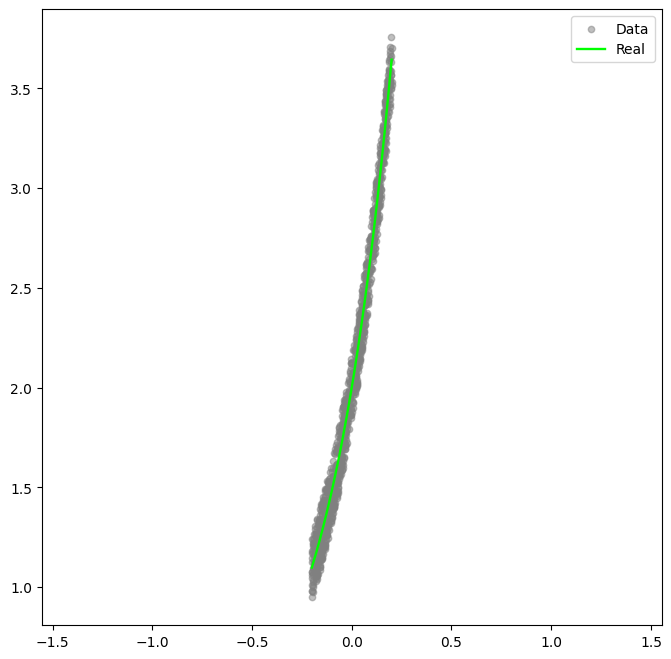

In [19]:
X, Y, Dataset_X, Dataset_Y = generate_simple(f, dots_count, dist, density, variance, weights)
print_generated(X, Y, Dataset_X, Dataset_Y)

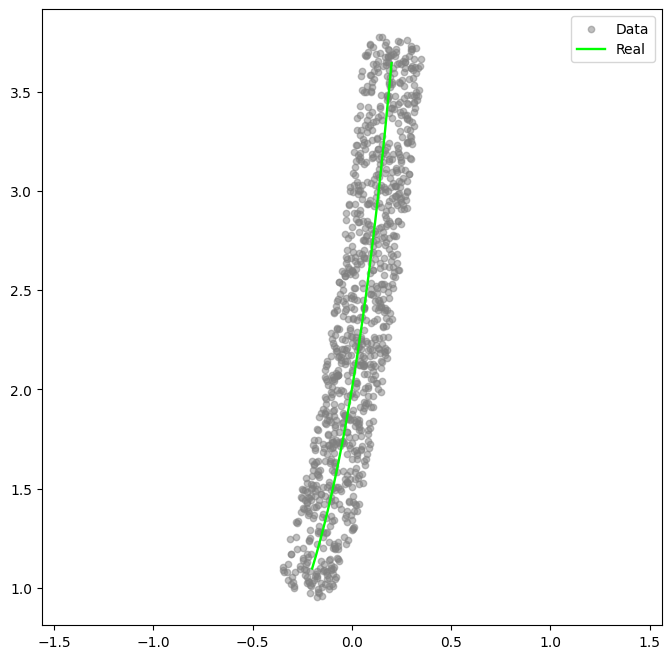

In [20]:
X, Y, Dataset_X, Dataset_Y = generate(f, dots_count, dist, density, variance, weights)
print_generated(X, Y, Dataset_X, Dataset_Y )